In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
stages = 4
steps = 30
# All the values in Logarithmic Scale.
noise_figure = np.zeros((steps,stages))
noise_figure[:,0] = np.linspace(1.5,6,steps)
noise_figure[:,1] = 10
noise_figure[:,2] = 10
noise_figure[:,3] = 30
noise_factor = 10**(noise_figure/10)

gain = np.zeros((steps,stages))
gain[:,0] = np.linspace(10,40,steps)
gain[:,1] = -6
gain[:,2] = 40
gain[:,3] = 0 # assumming no gain for spectrum analyzer.
gain_lin = 10**(gain/10)

iip3 = np.zeros((steps,stages))
iip3[:,0] = np.linspace(35,15,steps)
iip3[:,1] = 40
iip3[:,2] = 45
iip3[:,3] = 50 
iip3_lin = 10**(iip3/10) # in mW.

In [21]:
# I know I can simplyfy this but https://xkcd.com/1319/
noise_factor_rx_chain = noise_factor[:,0] + (noise_factor[:,1] - 1)/(gain_lin[:,0]) + (noise_factor[:,2]-1)/(gain_lin[:,0]*gain_lin[:,1]) + (noise_factor[:,3]-1)/(gain_lin[:,0]*gain_lin[:,1]*gain_lin[:,2])
noise_figure_rx_chain = 10*np.log10(noise_factor_rx_chain)

iip3_lin_total = 1/((1/iip3_lin[:,0]) + (gain_lin[:,0]/iip3_lin[:,1]) + (gain_lin[:,0]*gain_lin[:,1]/iip3_lin[:,2]) + ((gain_lin[:,0]*gain_lin[:,1]*gain_lin[:,2]/iip3_lin[:,3])))
iip3_total =10*np.log10(iip3_lin_total)

print(f"The minimum Noise Figure of the Chain is {noise_figure_rx_chain.min():0.2f} dB at the VGA gain of {gain[noise_figure_rx_chain.argmin(),0]:0.2f} dB")


The minimum Noise Figure of the Chain is 3.84 dB at the VGA gain of 21.38 dB


<Figure size 640x480 with 0 Axes>

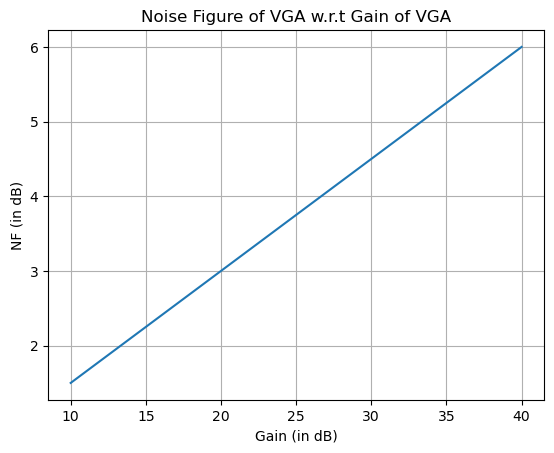

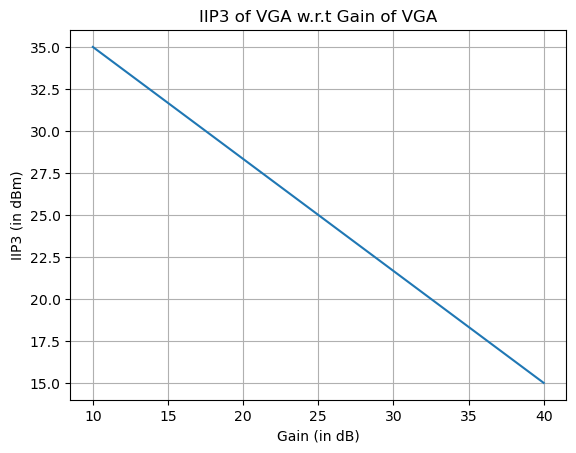

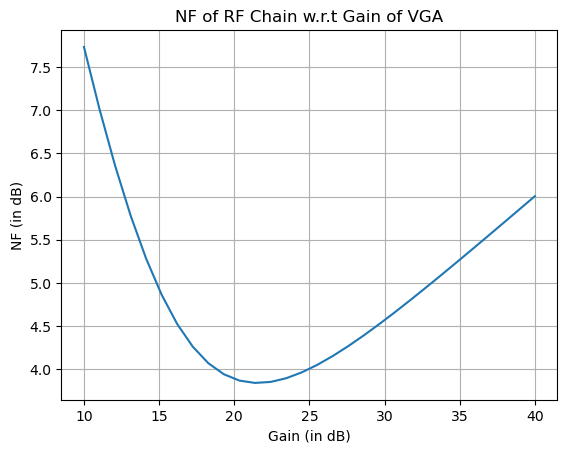

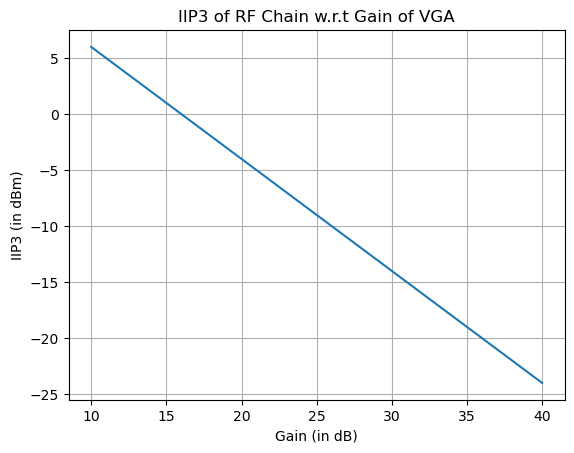

In [22]:
plt.tight_layout()
fig, ax = plt.subplots()
ax.plot(gain[:,0],noise_figure[:,0])
ax.set(title="Noise Figure of VGA w.r.t Gain of VGA", xlabel="Gain (in dB)", ylabel="NF (in dB)")
ax.grid()
plt.show()

fig, ax = plt.subplots()
ax.plot(gain[:,0],iip3[:,0])
ax.set(title="IIP3 of VGA w.r.t Gain of VGA", xlabel="Gain (in dB)", ylabel="IIP3 (in dBm)")
ax.grid()
plt.show()

fig, ax = plt.subplots()
ax.plot(gain[:,0],noise_figure_rx_chain)
ax.set(title="NF of RF Chain w.r.t Gain of VGA", xlabel="Gain (in dB)", ylabel="NF (in dB)")
ax.grid()
plt.show()

fig, ax = plt.subplots()
ax.plot(gain[:,0],iip3_total)
ax.set(title="IIP3 of RF Chain w.r.t Gain of VGA", xlabel="Gain (in dB)", ylabel="IIP3 (in dBm)")
ax.grid()
plt.show()